In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('banking_Churn.csv')

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#Statistics

data.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [5]:
#Check the columns

data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
#drop rows with less effect
newdata = data.drop(['RowNumber', 'CustomerId', 'Surname'] , axis=1 )


In [7]:
newdata.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
#Encoding geography and gender
newdata['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
encodata = pd.get_dummies(newdata,drop_first= True)

encodata.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
# Check the class imbalances

encodata['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

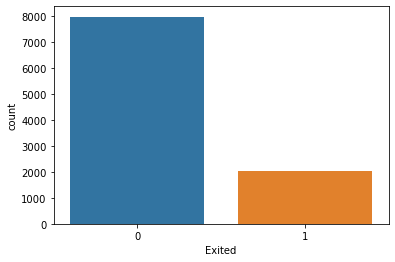

In [11]:
#plot a graph to see the imbalances using seaborn
#0 represents customers still in the bank
#1 customers who have left the bank
# An imbalance class means the target class has uneven distribution.

sns.countplot(encodata['Exited'])


In [12]:
#Separate dependent and independent variables
#X- independent variables
#y - dependent variables.

x = encodata.drop('Exited',axis = 1)

y = encodata['Exited']

In [13]:
#Lets handle the imbalance dataset
#we can use oversampling and undersampling
#oversampling

from imblearn.over_sampling import SMOTE


In [14]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [15]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [16]:
#Split the dataset into training set and test set

from sklearn.model_selection import train_test_split

In [17]:

x_train,x_test, y_train,y_test = train_test_split(x_res,y_res, test_size = 0.20 , random_state = 42)


In [18]:
#Feature scaling

from sklearn.preprocessing import StandardScaler 

In [19]:
sc = StandardScaler()

In [20]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [21]:
#our values are in the same scale

x_train

array([[ 0.41674238,  0.79934776,  1.17500451, ..., -0.5657477 ,
        -0.46163001, -0.85236213],
       [ 1.08302743,  0.0982331 , -1.39059797, ..., -0.5657477 ,
        -0.46163001,  1.17321026],
       [ 1.18133178,  0.0982331 , -0.65756869, ..., -0.5657477 ,
        -0.46163001, -0.85236213],
       ...,
       [ 0.18736556,  0.19839234,  1.17500451, ..., -0.5657477 ,
        -0.46163001,  1.17321026],
       [ 1.35609507, -0.10208538, -0.29105405, ...,  1.76757237,
        -0.46163001, -0.85236213],
       [ 0.51504673,  0.99966624, -1.39059797, ...,  1.76757237,
        -0.46163001,  1.17321026]])

In [22]:
import sklearn as sl

In [23]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

In [24]:
log = LogisticRegression()

In [25]:
log.fit(x_train,y_train)

LogisticRegression()

In [26]:
#prediction

y_predict = log.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, y_predict)

0.7827997489014438

In [29]:
#after handling imbalances 

accuracy_score(y_test, y_predict)

0.7827997489014438

In [30]:
#our data is imbalance

from sklearn.metrics import precision_score,recall_score,f1_score

In [31]:
precision_score(y_test,y_predict)

0.7702448210922788

In [32]:
#after handling imbalances

precision_score(y_test,y_predict)

0.7702448210922788

In [33]:
recall_score(y_test,y_predict)

0.7900837089504186

In [34]:
#after  handling imbalances

recall_score(y_test,y_predict)

0.7900837089504186

In [35]:
f1_score(y_test,y_predict)

0.7800381436745073

In [36]:
#after handling imbalances

f1_score(y_test,y_predict)

0.7800381436745073

# SVC

In [37]:
from sklearn import svm

In [38]:
svm = svm.SVC()

In [39]:
svm.fit(x_train,y_train)

SVC()

In [40]:
y_predict1 = svm.predict(x_test)

In [41]:
accuracy_score(y_test,y_predict1)

0.8389830508474576

In [42]:
precision_score(y_test,y_predict1)

0.8299492385786802

# KNeighbors Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()

In [45]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
y_predict2 = knn.predict(x_test)

In [47]:
accuracy_score(y_test,y_predict2)

0.8185812931575643

In [48]:
precision_score(y_test, y_predict2)

0.7952755905511811

# Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier()

In [51]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
y_predict3 = dt.predict(x_test)

In [53]:
accuracy_score(y_test,y_predict3)

0.783427495291902

In [54]:
precision_score(y_test,y_predict3)

0.7671826625386997

# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier()

In [57]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
y_predict4 = rf.predict(x_test)

In [59]:
accuracy_score(y_test,y_predict4)

0.8618957940991839

In [60]:
precision_score(y_test,y_predict4)

0.8524382520582647

# Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbc = GradientBoostingClassifier()

In [63]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [64]:
y_predict5 = gbc.predict(x_test)

In [65]:
accuracy_score(y_test,y_predict5)

0.839924670433145

In [66]:
precision_score(y_test,y_predict5)

0.8358016741790084

In [67]:
#Visualize model performance

final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                          'ACC':[accuracy_score(y_test,y_predict),
                                accuracy_score(y_test,y_predict1),
                                accuracy_score(y_test,y_predict2),
                                accuracy_score(y_test,y_predict3),
                                accuracy_score(y_test,y_predict4),
                                accuracy_score(y_test,y_predict5),]})

In [68]:
final_data

,Models,ACC
0,LR,0.782800
1,SVC,0.838983
2,KNN,0.818581
3,DT,0.783427
4,RF,0.861896
5,GBC,0.839925


<AxesSubplot:xlabel='Models', ylabel='ACC'>

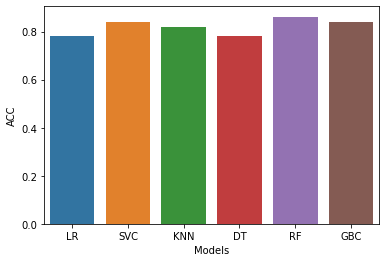

In [69]:
#Visualize the dataframe

sns.barplot(final_data['Models'], final_data['ACC'])

# Save the model

In [70]:
x_res = sc.fit_transform(x_res)

In [71]:
rf.fit(x_res,y_res)

RandomForestClassifier()

In [148]:
#save the model

import pickle as pckl

In [73]:
pickle.dump(rf,open ('bank.pkl','wb'))

In [74]:
#if you want to use the model

pickled_model = pickle.load(open('C:/Users/pxc/Desktop/try/Machine-Learning-Model/bank.pkl','rb'))

In [75]:
pickled_model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)